In [1]:
import gdal
import pandas as pd
import numpy as np

In [2]:
def get_val(dat,gt=[],rb=[]):
    ''' Grab cell value based on data frame x and y variables.
    dat = dataframe containing x and y 
    gt = geotransform, of the index raster
    rb = raster band to pick data from
    '''
    mx = dat.x
    my = dat.y
    # transform to array coordinates
    px = int((mx-gt[0])/gt[1]) # x pixle
    py = int((my-gt[3])/gt[5]) # y pixle

    # extract the value
    intval = rb.ReadAsArray(px,py,1,1)
    return intval[0][0]

In [3]:
fl = './data/CPG_from_roy/region_17/MirAd_2012_100_CPG.tif'
ds = gdal.Open(fl)
gt = ds.GetGeoTransform()
rb = ds.GetRasterBand(1)

In [4]:
fl = '../DEM_processing/data/CATCHMENT_snapped_cpgDat_reg_17.csv'
testDat = pd.read_csv(fl)
del testDat['Unnamed: 0']
del testDat['Unnamed: 0.1']

In [5]:
testDat.head()

,cat,x,y,Gage_no,withdr1k,withdr1k_noData,mirad1k,mirad1k_noData,mirad250,mirad250_noData,...,nid_storage,nid_storage_noData,nid_normstorage,nid_normstorage_noData,npd_occur,npd_occur_noData,nlcd_2011_imperv,nlcd_2011_imperv_noData,ditches92_scale,ditches92_scale_noData
0,1,-1703250.0,2521380.0,13220500,1.125079,0.0,0.009270,0.014724,8.823986e-05,0.014293,...,0.000436,0.013824,0.000432,0.013824,0.0,0.013824,0.002137,0.015395,0.000000e+00,0.014378
1,2,-2192520.0,2442660.0,14362250,0.015169,0.0,0.000000,0.000080,0.000000e+00,0.000076,...,0.000000,0.000073,0.000000,0.000073,0.0,0.000073,0.000016,0.000080,0.000000e+00,0.000076
2,3,-2119230.0,2708040.0,14173500,0.210844,0.0,0.007658,0.001440,7.279971e-05,0.001679,...,0.000000,0.001684,0.000000,0.001684,0.0,0.001684,0.002853,0.001820,2.833502e-02,0.000640
3,4,-2093280.0,2594610.0,14145100,0.186470,0.0,0.000000,0.001934,0.000000e+00,0.001845,...,0.000563,0.001773,0.000555,0.001773,0.0,0.001773,0.000122,0.001981,0.000000e+00,0.001844
4,5,-2181330.0,2693610.0,14306400,0.064112,0.0,0.000048,0.000564,4.758926e-07,0.000541,...,0.000000,0.000521,0.000000,0.000521,0.0,0.000521,0.000190,0.000563,8.425584e-07,0.000540


In [10]:
%%timeit
testDat['MIRAD_PROSPER'] = testDat.apply(get_val,gt = gt, rb = rb, axis = 1)

397 ms ± 712 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
testDat.MIRAD_PROSPER /= 100.

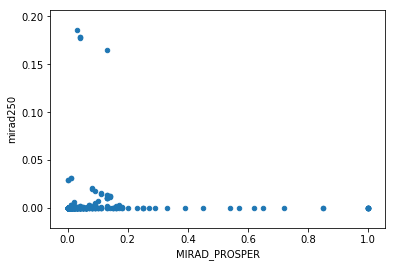

In [23]:
testDat.plot.scatter('MIRAD_PROSPER','mirad250')

In [36]:
testDat['resid'] = testDat.MIRAD_PROSPER - testDat.mirad250
testDat.loc[testDat.resid == 0].shape

(750, 26)

Text(0,0.5,'Count')

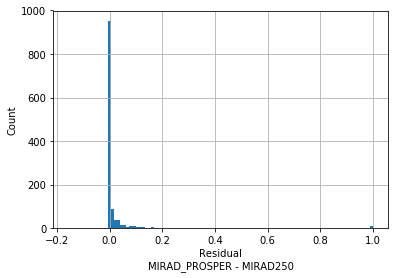

In [32]:
p = testDat.resid.hist(bins=100)
p.set_xlabel('Residual\nMIRAD_PROSPER - MIRAD250')
p.set_ylabel('Count')

In [37]:
testDat['resid'] = testDat.MIRAD_PROSPER - testDat.mirad1k
testDat.loc[testDat.resid == 0].shape

(707, 26)

Text(0,0.5,'Count')

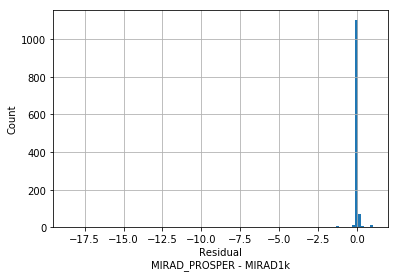

In [34]:
p = testDat.resid.hist(bins=100)
p.set_xlabel('Residual\nMIRAD_PROSPER - MIRAD1k')
p.set_ylabel('Count')